In [2]:
text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")

text

NameError: name 'text' is not defined

In [3]:
library(dplyr)
text_df <- tibble(line = 1:4, text = text)

text_df


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



line,text
1,Because I could not stop for Death -
2,He kindly stopped for me -
3,The Carriage held but just Ourselves -
4,and Immortality


In [4]:
library(tidytext)

text_df %>%
  unnest_tokens(word, text)

line,word
1,because
1,i
1,could
1,not
1,stop
1,for
1,death
2,he
2,kindly
2,stopped


In [5]:
library(janeaustenr)
library(dplyr)
library(stringr)

original_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                 ignore_case = TRUE)))) %>%
  ungroup()

original_books


text,book,linenumber,chapter
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0
CHAPTER 1,Sense & Sensibility,10,1


In [6]:
library(tidytext)
tidy_books <- original_books %>%
  unnest_tokens(word, text)

tidy_books

book,linenumber,chapter,word
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1
Sense & Sensibility,13,1,the


In [7]:
data(stop_words)

tidy_books <- tidy_books %>%
  anti_join(stop_words)

Joining, by = "word"


In [8]:
tidy_books %>%
  count(word, sort = TRUE) 

word,n
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806
day,797
emma,787
sister,727
house,699


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


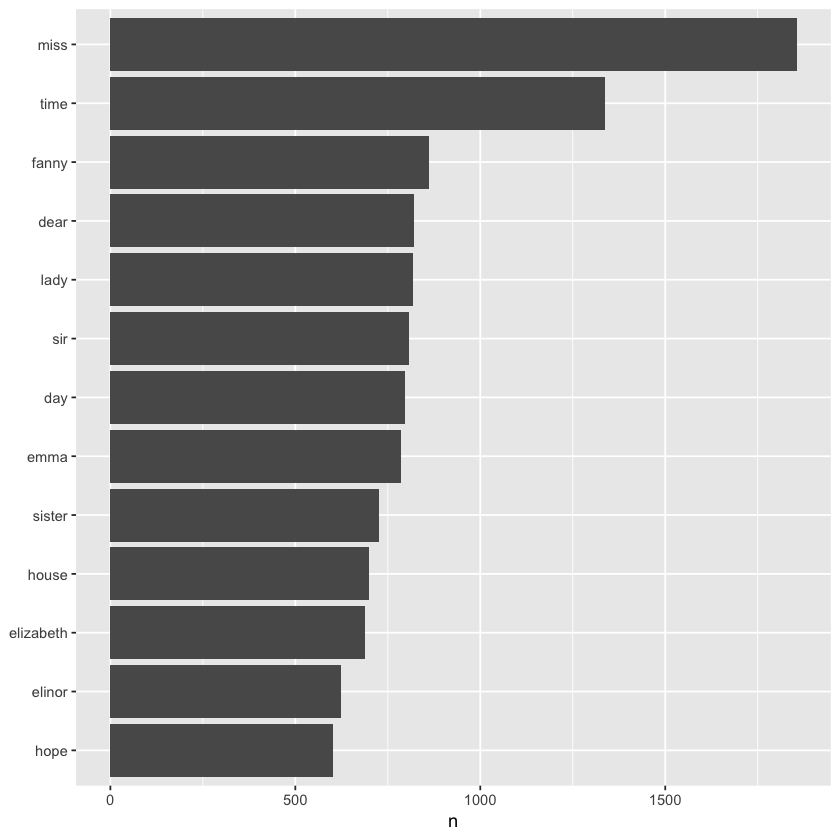

In [9]:
library(ggplot2)

tidy_books %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip()

In [10]:
get_sentiments("afinn")

word,score
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3
abhors,-3


In [11]:
library(gutenbergr)

hgwells <- gutenberg_download(c(35, 36, 5230, 159))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


In [12]:
# install.packages("gutenbergr")

In [13]:
library(gutenbergr)

hgwells <- gutenberg_download(c(35, 36, 5230, 159))

In [14]:
# library(tidytext)
# tidy_books <- hgwells %>%
#   unnest_tokens(word, text)

# tidy_books

In [15]:
data(stop_words)

tidy_hgwells <- tidy_books %>%
  anti_join(stop_words)

Joining, by = "word"


In [16]:
# tidy_books %>%
#   count(word, sort = TRUE) 

In [17]:
tidy_hgwells <- hgwells %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"


In [18]:
tidy_hgwells %>%
  count(word, sort = TRUE)

word,n
time,454
people,302
door,260
heard,249
black,232
stood,229
white,222
hand,218
kemp,213
eyes,210


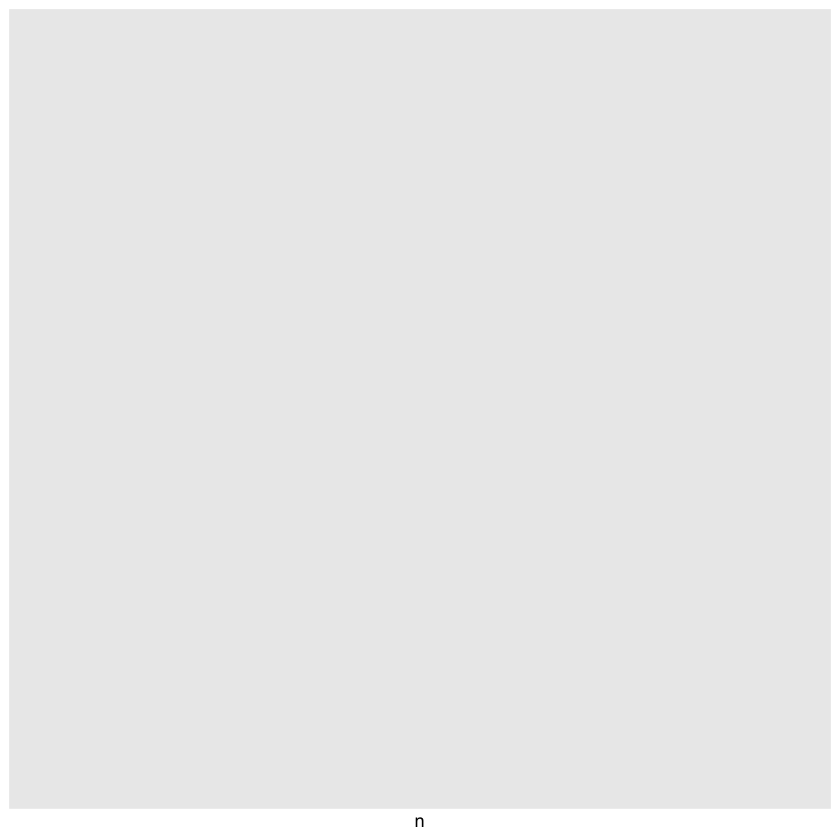

In [19]:
library(ggplot2)

tidy_hgwells %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip()

In [20]:
bronte <- gutenberg_download(c(1260, 768, 969, 9182, 767))


In [21]:
tidy_bronte <- bronte %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)


Joining, by = "word"


In [22]:
tidy_bronte %>%
  count(word, sort = TRUE)

word,n
time,1065
miss,855
day,827
hand,768
eyes,713
night,647
heart,638
looked,601
door,592
half,586


In [23]:
library(tidyr)

frequency <- bind_rows(mutate(tidy_bronte, author = "Brontë Sisters"),
                       mutate(tidy_hgwells, author = "H.G. Wells"), 
                       mutate(tidy_books, author = "Jane Austen")) %>% 
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(author, word) %>%
  group_by(author) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  spread(author, proportion) %>% 
  gather(author, proportion, `Brontë Sisters`:`H.G. Wells`)

In [26]:
library(scales)
jpeg("rplot.jpg")
# expect a warning about rows with missing values being removed
ggplot(frequency, aes(x = proportion, y = `Jane Austen`, color = abs(`Jane Austen` - proportion))) +
  geom_abline(color = "gray40", lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.001), low = "darkslategray4", high = "gray75") +
  facet_wrap(~author, ncol = 2) +
  theme(legend.position="none") +
  labs(y = "Jane Austen", x = NULL)
dev.off()

Warning message:
“Removed 41350 rows containing missing values (geom_point).”Warning message:
“Removed 41352 rows containing missing values (geom_text).”

pdf 
  2

In [24]:
cor.test(data = frequency[frequency$author == "Brontë Sisters",],
         ~ proportion + `Jane Austen`)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 119.65, df = 10404, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7527887 0.7689659
sample estimates:
      cor 
0.7609955 


In [25]:
cor.test(data = frequency[frequency$author == "H.G. Wells",], 
         ~ proportion + `Jane Austen`)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 36.436, df = 6052, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4032643 0.4445870
sample estimates:
      cor 
0.4241464 


In [26]:
library(janeaustenr)
library(dplyr)
library(stringr)

tidy_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%
  unnest_tokens(word, text)

In [27]:
nrc_joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "joy")

tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrc_joy) %>%
  count(word, sort = TRUE)

Joining, by = "word"


word,n
good,359
young,192
friend,166
hope,143
happy,125
love,117
deal,92
found,92
present,89
kind,82


In [28]:
library(tidyr)

jane_austen_sentiment <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(book, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


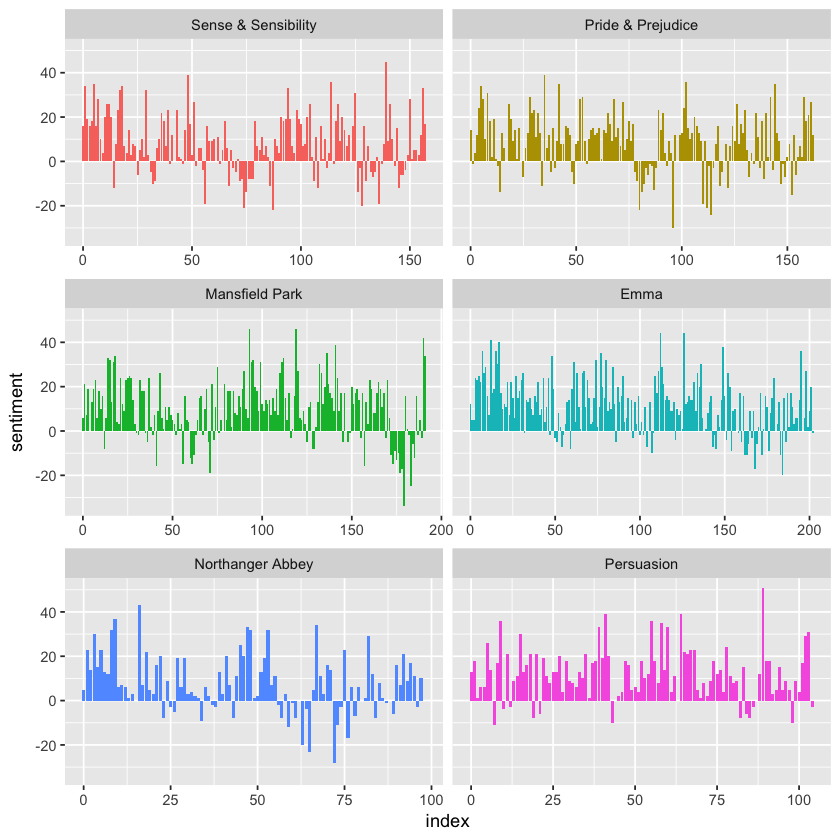

In [29]:
library(ggplot2)

ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free_x")

In [30]:
pride_prejudice <- tidy_books %>% 
  filter(book == "Pride & Prejudice")

pride_prejudice

book,linenumber,chapter,word
Pride & Prejudice,1,0,pride
Pride & Prejudice,1,0,and
Pride & Prejudice,1,0,prejudice
Pride & Prejudice,3,0,by
Pride & Prejudice,3,0,jane
Pride & Prejudice,3,0,austen
Pride & Prejudice,7,1,chapter
Pride & Prejudice,7,1,1
Pride & Prejudice,10,1,it
Pride & Prejudice,10,1,is


In [31]:
library(tidytext)

get_sentiments("afinn")

word,score
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3
abhors,-3


In [32]:
get_sentiments("bing")


word,sentiment
2-faced,negative
2-faces,negative
a+,positive
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative


In [33]:
get_sentiments("nrc")


word,sentiment
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger
abandonment,fear


In [34]:
afinn <- pride_prejudice %>% 
  inner_join(get_sentiments("afinn")) %>% 
  group_by(index = linenumber %/% 80) %>% 
  summarise(sentiment = sum(value)) %>% 
  mutate(method = "AFINN")
get_sentiments("nrc") %>% 
     filter(sentiment %in% c("positive", 
                             "negative")) %>% 
  count(sentiment)

get_sentiments("bing") %>% 
  count(sentiment)
bing_and_nrc <- bind_rows(pride_prejudice %>% 
                            inner_join(get_sentiments("bing")) %>%
                            mutate(method = "Bing et al."),
                          pride_prejudice %>% 
                            inner_join(get_sentiments("nrc") %>% 
                                         filter(sentiment %in% c("positive", 
                                                                 "negative"))) %>%
                            mutate(method = "NRC")) %>%
  count(method, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


ERROR: Error: 找不到物件 'value'


In [35]:
get_sentiments("nrc") %>% 
     filter(sentiment %in% c("positive", 
                             "negative")) %>% 
  count(sentiment)

get_sentiments("bing") %>% 
  count(sentiment)

sentiment,n
negative,3324
positive,2312


sentiment,n
negative,4782
positive,2006


In [36]:
bing_word_counts <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

bing_word_counts

Joining, by = "word"


word,sentiment,n
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639
enough,positive,613
happy,positive,534
love,positive,495
pleasure,positive,462


Selecting by n


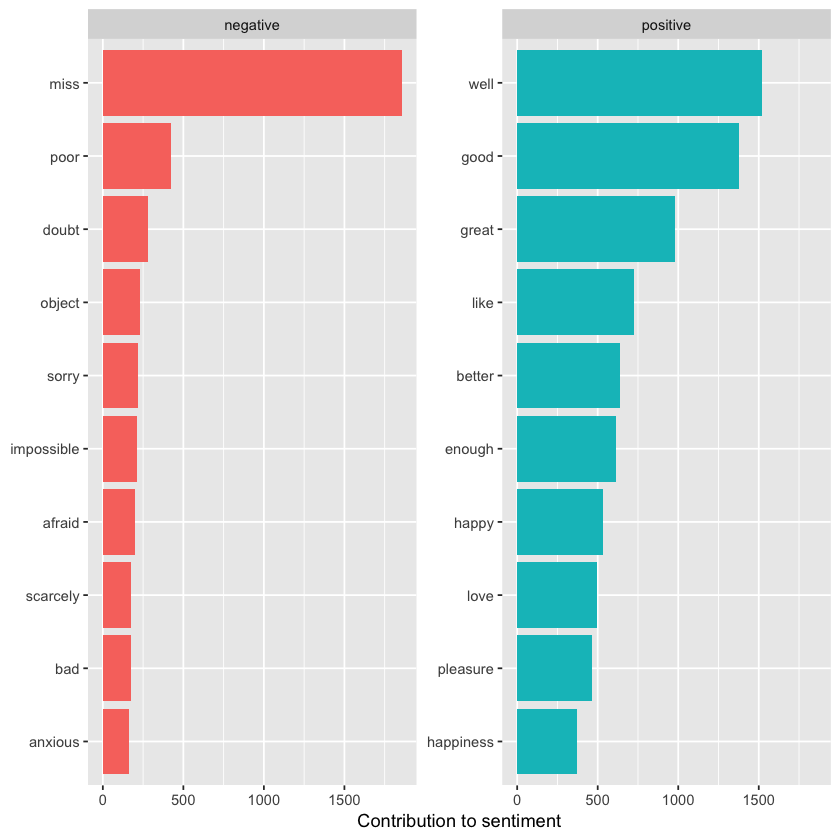

In [37]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [38]:
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

ERROR: Error in library(wordcloud): there is no package called ‘wordcloud’


In [40]:
install.packages (“tm”)


ERROR: Error in parse(text = x, srcfile = src): <text>:1:19: unexpected input
1: install.packages (<e2>
                      ^


In [42]:

install.packages(“wordcloud”)



ERROR: Error in parse(text = x, srcfile = src): <text>:2:18: unexpected input
1: 
2: install.packages(<e2>
                    ^


In [43]:
install.packages("wordcloud")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Loading required package: RColorBrewer
Joining, by = "word"


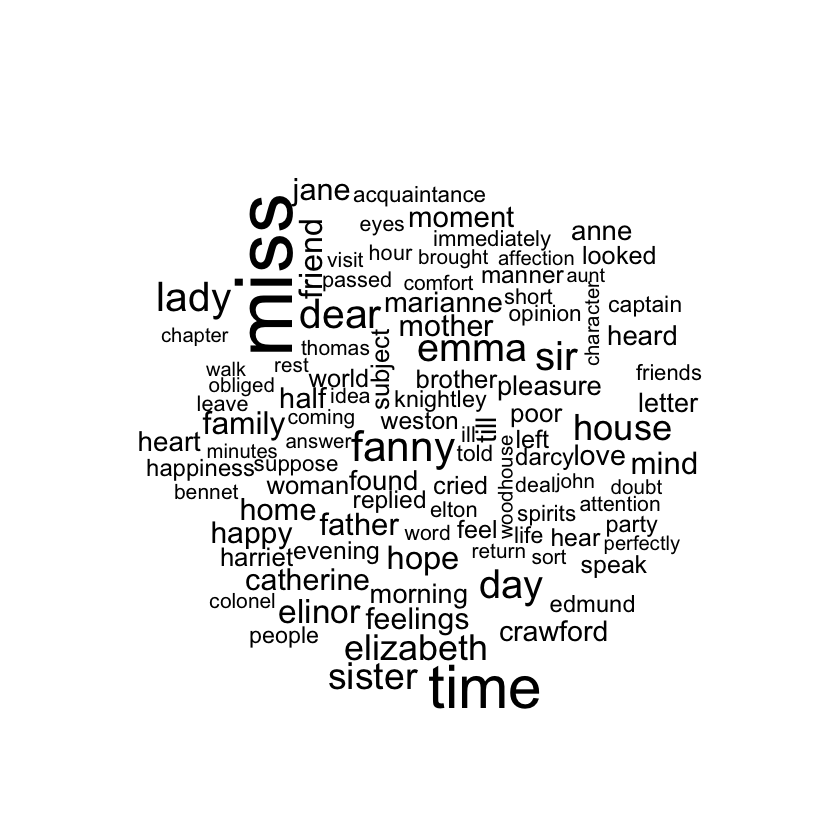

In [44]:
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

In [ ]:
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))